# <span style="color:navy"> Numerical Simulation Laboratory
# <span style="color:orange"> Numerical Exercises 11
### Neural Networks  & Machine Learning 

##### <span style="color:black"> Exercise 11.1 </span>
The first problem to deal with in learning something about *Neural Networks* (NN) is the linear regression. Neural networks work with layers of neurons that receive inputs, and give on outptuts after weighting the input and eventually introducing a bias. This two parameters are what the training phase tries to optimize in order to fit best the validation data. Given the problem of a linear regresion therefore only a layer of a single neuron is needed, thus giving the two parameters *m* and *b* of the linear function $f(x)=mx+b$.  
The problem we had to face was to fit data displayed like a linear with *m = 2* and *b = 1*.  
By doing multiple attempts I found that introucing a little variance to data improves the result obtained with perfectly generated data; this may due to the possibility of greater generalization the machine has if data are not perfectly on a line. To be onest, in my opinion what helps the most in improving the fit is the number of training points and therefore of validation. By using a dataset of $\scriptsize{N_{train} = 500}$ points intead of *100* the fit obtained is perfect and the mean squared error of the fit becomes $10^5$ times lower.

In [26]:
# figures parameters
import matplotlib as mpl
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['figure.subplot.wspace'] = 0.2
mpl.rcParams['figure.subplot.hspace']= 0.4

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
#np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

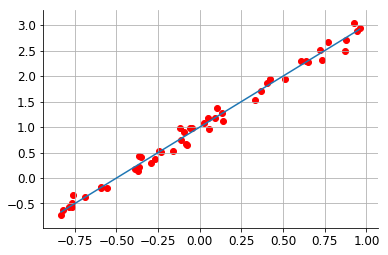

In [28]:
# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [29]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
#just a x as input

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [30]:
# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [31]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 500 samples, validate on 50 samples
Epoch 1/50
500/500 [==============================] - 0s 505us/sample - loss: 4.9233 - mean_squared_error: 4.9233 - val_loss: 3.5177 - val_mean_squared_error: 3.5177
Epoch 2/50
500/500 [==============================] - 0s 37us/sample - loss: 3.6999 - mean_squared_error: 3.6999 - val_loss: 2.6581 - val_mean_squared_error: 2.6581
Epoch 3/50
500/500 [==============================] - 0s 40us/sample - loss: 2.8437 - mean_squared_error: 2.8437 - val_loss: 2.0453 - val_mean_squared_error: 2.0453
Epoch 4/50
500/500 [==============================] - 0s 73us/sample - loss: 2.2136 - mean_squared_error: 2.2136 - val_loss: 1.5978 - val_mean_squared_error: 1.5978
Epoch 5/50
500/500 [==============================] - 0s 69us/sample - loss: 1.7432 - mean_squared_error: 1.7432 - val_loss: 1.2560 - val_mean_squared_error: 1.2560
Epoch 6/50
500/500 [==============================] - 0s 59us/sample - loss: 1.3791 - mean_squared_error: 1.3791 - val_loss: 0.99

In [32]:
# return weights
model.get_weights()

[array([[1.992828]], dtype=float32), array([0.999669], dtype=float32)]

In [33]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test mse:', score[1])

50/50 [==============================] - 0s 150us/sample - loss: 0.0116 - mean_squared_error: 0.0116

Test loss: 0.011641077995300293
Test mse: 0.011641078


In [34]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test mse:', score[1])

50/50 [==============================] - 0s 265us/sample - loss: 1.4793e-05 - mean_squared_error: 1.4793e-05

Test loss: 1.479256054153666e-05
Test mse: 1.4792561e-05


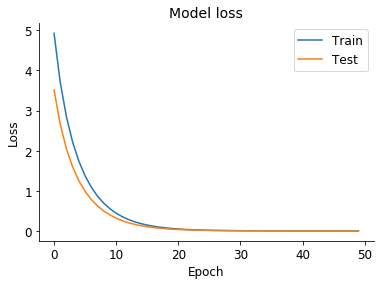

In [35]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

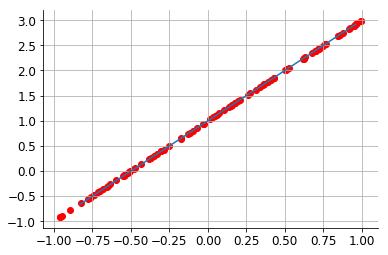

In [36]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

##### <span style="color:black"> Exercise 11.2 </span>

The second challenge was to obtain a fit for the following cubic function:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

To do that I made some different attempts increasing the complexity of NN and changing some featrures like the optimizer and the cost function. Since from the previous exercise I learnt that is good to have a great ammount of data to use in training the network, I used $\scriptsize{N_{train} = 10000}$ and $\scriptsize{N_{test} = 1000}$, and trained for *100* epochs each NN, using the same data for each, I also increased a little bit the standard deviation for generating noisy train and valid dataset, since I evaluated that this problem is more difficult to generalize.  
Following is a picture with the validation data and the target function to fit.

In [37]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [38]:
#polinomial fitting
#####params#####
N_train = 10000
N_valid = 1000
N_epochs = 100
sigma = 0.15     #noise standard deviation
################

In [58]:
def f(x):
    return 4.0 -3.0*x -2.0*x**2 +3*x**3

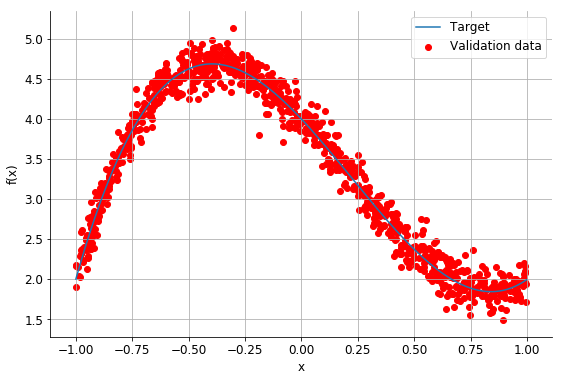

In [40]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()

y_target = f(x_valid) # ideal (target) polinomial function

y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

# plot training and target dataset
plt.figure(figsize=(9, 6))
plt.plot(x_valid, y_target, label='Target')
plt.scatter(x_valid, y_valid, color='r', label='Validation data')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

***Attempt 1***  
The first attempt I did was with a single layer with 12 neurons, to be onest there are to layers since the output is a single number there must be as last layer one single neuron that will have the value of the function predicted for the *x* in input; being this layer necessary it is present in all NN I build, so i'll not consider it when talking about different NNs.  
I used as activation function the relu and as optimizer the *stocastic gradient descent* and mean square error as loss function.


In [41]:
from tensorflow.keras.models import load_model
model = load_model("Saved/model_12_relu_sdg.mod")

# get a summary of our composed model
model.summary()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print("Performance on validation data")
print('Test loss:', score[0])
print('Test mse:', score[1])

# evaluate model on trainig data 
score = model.evaluate(x_train, y_train, batch_size=32, verbose=1)
# print performance
print()
print("Performance on training data")
print('Test loss:', score[0])
print('Test mse:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
print()
print("Performance compared to exact curve")
print('Test loss:', score[0])
print('Test mse:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
1000/1000 [==============================] - 0s 174us/sample - loss: 0.0451 - mean_squared_error: 0.0451
Performance on validation data
Test loss: 0.04507003200054169
Test mse: 0.04507003
10000/10000 [==============================] - 1s 79us/sample - loss: 0.0459 - mean_squared_error: 0.0459

Performance on training data
Test loss: 0.045940146219730374
Test mse: 0.045940164
1000/1000 [==============================] - 0s 132us/sample - loss: 0.0234 - mean_squared_error: 0.0234

Performance compared to exact curve
Test loss: 0.023442965

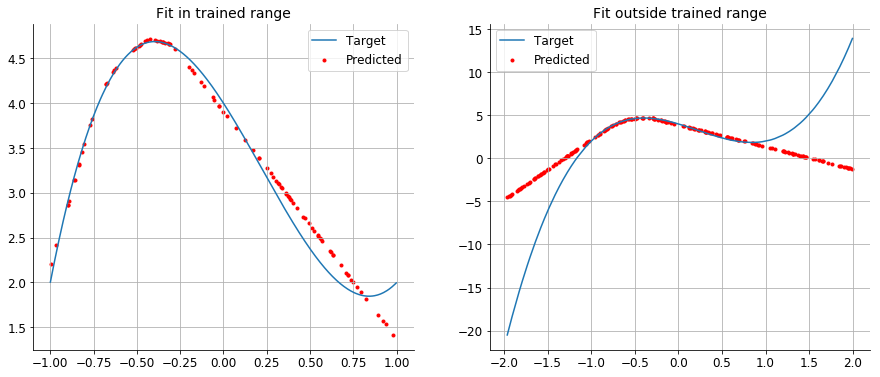

In [42]:
x_predicted = np.random.uniform(-1, 1, 100)
x_out_range = np.random.uniform(-2, 2, 200)
x_out_range.sort()
y_predicted = model.predict(x_predicted)
y_pred_out = model.predict(x_out_range)
y_out_target = f(x_out_range)

fig, axes = plt.subplots (1,2, figsize=(15,6))
axes[0].scatter(x_predicted, y_predicted,color='r', marker='.', label='Predicted')
axes[0].plot(x_valid, y_target, label = 'Target')


axes[1].scatter(x_out_range, y_pred_out,color='r', marker='.', label='Predicted')
axes[1].plot(x_out_range, y_out_target, label = 'Target')
     
axes[0].set_title("Fit in trained range")
axes[1].set_title("Fit outside trained range")
for i in range(2):
    axes[i].grid(True)
    axes[i].legend()
plt.show()

***Attempt 2***  
Since I noticed that *relu* function seemed to make the fit too sharp, while it is needed something smoother, in the second attempt I changed the activation number in *tanh*  and increased the number of layers with different number of neurons. In particular I used 3 layers of respectively of *15* neurons each, leaving other parameters the same.

In [43]:
model = load_model("Saved/model_15_15_15_tanh_sgd.mod")

# get a summary of our composed model
model.summary()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print("Performance")
print('Test loss:', score[0])
print('Test mse:', score[1])

# evaluate model on trainig data 
score = model.evaluate(x_train, y_train, batch_size=32, verbose=1)
# print performance
print()
print("Performance on training data")
print('Test loss:', score[0])
print('Test mse:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
print()
print("Performance compared to exact curve")
print('Test loss:', score[0])
print('Test mse:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_7 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_8 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 16        
Total params: 526
Trainable params: 526
Non-trainable params: 0
_________________________________________________________________
1000/1000 [==============================] - 0s 111us/sample - loss: 0.0237 - mean_squared_error: 0.0237
Performance
Test loss: 0.023697438180446624
Test mse: 0.02369744
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0238 - mean_squared_error: 0.0238


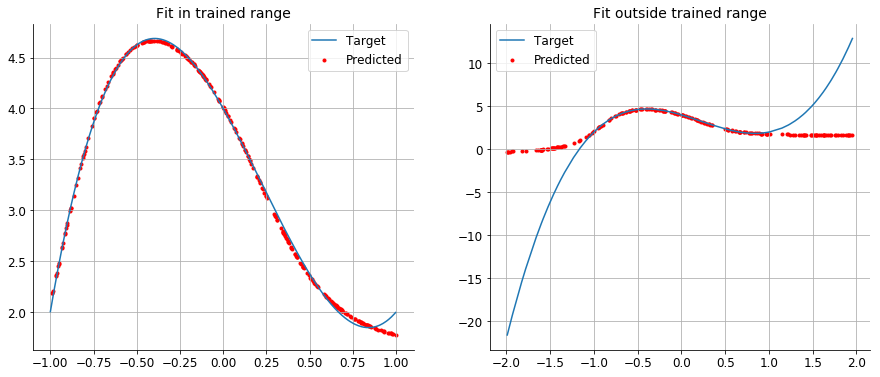

In [44]:
x_predicted = np.random.uniform(-1, 1, 300)
x_out_range = np.random.uniform(-2, 2, 200)
x_out_range.sort()
y_predicted = model.predict(x_predicted)
y_pred_out = model.predict(x_out_range)
y_out_target = f(x_out_range)

fig, axes = plt.subplots (1,2, figsize=(15,6))
axes[0].scatter(x_predicted, y_predicted,color='r', marker='.', label='Predicted')
axes[0].plot(x_valid, y_target, label = 'Target')


axes[1].scatter(x_out_range, y_pred_out,color='r', marker='.', label='Predicted')
axes[1].plot(x_out_range, y_out_target, label = 'Target')
     
axes[0].set_title("Fit in trained range")
axes[1].set_title("Fit outside trained range")
for i in range(2):
    axes[i].grid(True)
    axes[i].legend()
plt.show()

***Attempt 3***

After observing a great improvement with those changes I only tried to change the optimizer, using this time an *adagrad*, and leaving as loss function the *mean squared error*.

In [45]:
model = load_model("Saved/model_15_15_15_tanh_Adagrad.mod")

# get a summary of our composed model
model.summary()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print("Performance")
print('Test loss:', score[0])
print('Test mse:', score[1])

# evaluate model on trainig data 
score = model.evaluate(x_train, y_train, batch_size=32, verbose=1)
# print performance
print()
print("Performance on training data")
print('Test loss:', score[0])
print('Test mse:', score[1])


# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
print()
print("Performance compared to exact curve")
print('Test loss:', score[0])
print('Test mse:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_53 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_54 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 16        
Total params: 526
Trainable params: 526
Non-trainable params: 0
_________________________________________________________________
1000/1000 [==============================] - 0s 119us/sample - loss: 0.0248 - mean_squared_error: 0.0248
Performance
Test loss: 0.024810177206993102
Test mse: 0.024810178
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0246 - mean_squared_error: 0.0246

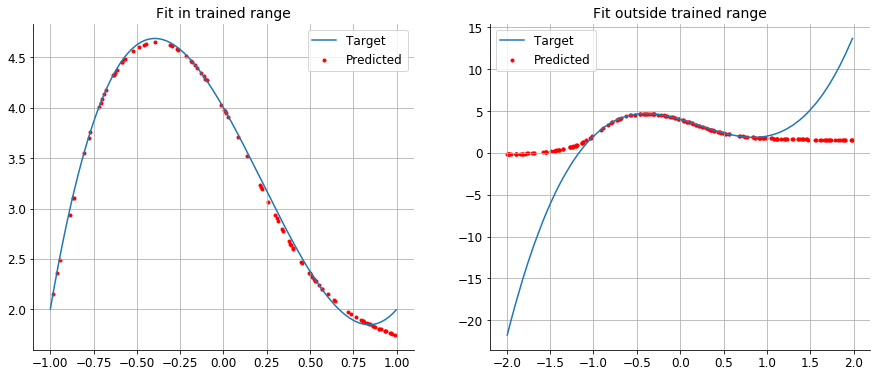

In [46]:
x_predicted = np.random.uniform(-1, 1, 100)
x_out_range = np.random.uniform(-2, 2, 200)
x_out_range.sort()
y_predicted = model.predict(x_predicted)
y_pred_out = model.predict(x_out_range)
y_out_target = f(x_out_range)

fig, axes = plt.subplots (1,2, figsize=(15,6))
axes[0].scatter(x_predicted, y_predicted,color='r', marker='.', label='Predicted')
axes[0].plot(x_valid, y_target, label = 'Target')


axes[1].scatter(x_out_range, y_pred_out,color='r', marker='.', label='Predicted')
axes[1].plot(x_out_range, y_out_target, label = 'Target')
     
axes[0].set_title("Fit in trained range")
axes[1].set_title("Fit outside trained range")
for i in range(2):
    axes[i].grid(True)
    axes[i].legend()
plt.show()

***Attempt 4***

With *adagrad* the fit seems to improve, so I changed only a bit the model. Because of the fact that in the last part of the interval the function has a quite sharp change of the first derivative sign. For this reason I added other two layers of *15* neurons, counting on the fact that increase in NN depth had never brought a worsening of the fit, and I choose for them *relu* activation. I kept the *adagrad* optimizer and the *mean squared error* loss function.

In [56]:
model = load_model("Saved/model_15_15_15_tanh_15_15_relu_adagrad.mod")

# get a summary of our composed model
model.summary()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print("Performance")
print('Test loss:', score[0])
print('Test mse:', score[1])

# evaluate model on trainig data 
score = model.evaluate(x_train, y_train, batch_size=32, verbose=1)
# print performance
print()
print("Performance on training data")
print('Test loss:', score[0])
print('Test mse:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
print()
print("Performance compared to exact curve")
print('Test loss:', score[0])
print('Test mse:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 1,006
Trainable params: 1,006
Non-trainable params: 0
_________________________________________________________________
1000/100

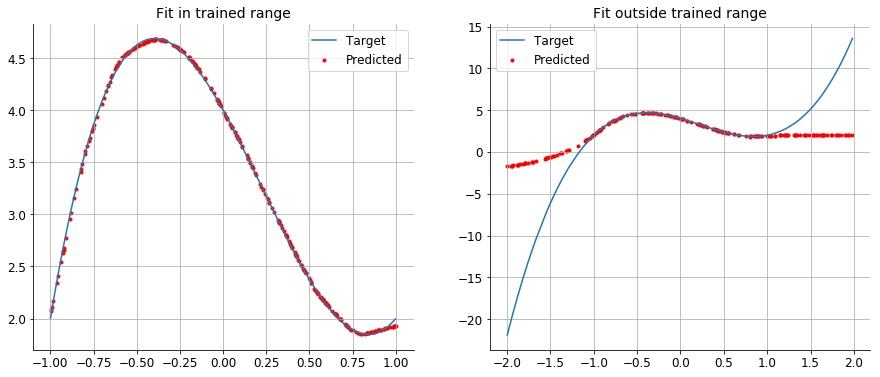

In [59]:
x_predicted = np.random.uniform(-1, 1, 300)
x_out_range = np.random.uniform(-2, 2, 200)
x_out_range.sort()
y_predicted = model.predict(x_predicted)
y_pred_out = model.predict(x_out_range)
y_out_target = f(x_out_range)

fig, axes = plt.subplots (1,2, figsize=(15,6))
axes[0].scatter(x_predicted, y_predicted,color='r', marker='.', label='Predicted')
axes[0].plot(x_valid, y_target, label = 'Target')


axes[1].scatter(x_out_range, y_pred_out,color='r', marker='.', label='Predicted')
axes[1].plot(x_out_range, y_out_target, label = 'Target')
     

axes[0].set_title("Fit in trained range")
axes[1].set_title("Fit outside trained range")
for i in range(2):
    axes[i].grid(True)
    axes[i].legend()
plt.show()

***Conclusion***  
Summarizing I think that what can be confirmed is that in general adding neurons and layers brings improvement in the fitting functions as it adds number of parameters to optimize. It seems also that NN depth is more important than the extension of the single layer, even though I don't know why this should happen. I also would say that for smooth function the *tanh* activation function is good as it is smooth enough, while *relu* may be added in lesser quantity of neurons to add possibility of sharper change of slopes (this is what I observe from attempt 1 to 2).  
The increasing in goodness of the models is given by the test loss decreasing with the number of attempts, and since error on validation and training data are similar I can be sure that I did not income in overfitting.
As said before using big dataset for training helps in optimizing the network that reaches good results if comparing prediction with target, as the pictures show. Another conclusion I reached is that *Adagrad* seems a better optimizer than *sgd*, this is may because it is adapted on the learning rate for the parameters and so may works "punctually" where is needed.
Another important comment highlighted by plots on a larger range than the one trained is that NN works specifically on the training data, but are not able to generalize to larger intervals; this is also the reason why it is difficult to fit the slope change near *x=1*, since it is a very short part of the interval and information on the incresing part is little.

##### <span style="color:black"> Exercise 11.3 </span>

The last exercise was trying to train a NN in order to fit a function from $\mathbb{R}^2$ to $\mathbb{R}$, which is:
$$
f(x,y) = \sin(x^2+y^2)
$$
in the range $\scriptsize{x \in [-3/2,3/2]}$ and $\scriptsize{y \in [-3/2,3/2]}$.  
The first thing to do is to sample the training and validation data, which are both couples of (x,y), and for this reason in the first layer of the NN it is important to set the input shape to 2.  
As a start I thought it could be a good idea to copy the previous model which fitted best. For this reason as first attempt I used the three *15*-neurons layer of *Attempt 3*, but increased the number of $\scriptsize{N_{train}}$ up to *30000* and $\scriptsize{N_{test}}$ up to *3000* and performed training over *300* epochs.
Then I tried with the NN that before was found to be the best, with both the optimizers *Adagrad* and *Adam* and training it with the new parameters, but over *100* epochs.

In [49]:
def f(x, y):
    return np.sin(x**2+y**2)

In [50]:
n_t = 30000 #N_train
n_v = 3000  #N_valid
n_e = 300   #N_epochs
sigma = 0.15  

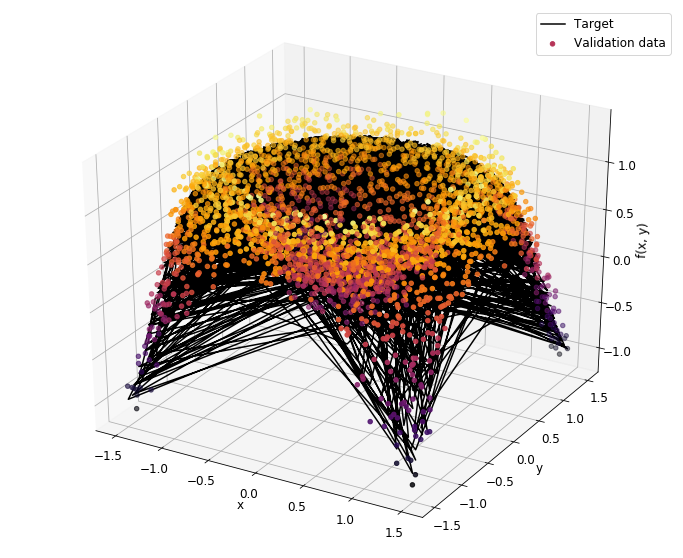

In [51]:
from mpl_toolkits.mplot3d import Axes3D
# generate training inputs
np.random.seed(0)
xy_train = np.random.uniform(low=-1.5, high=1.5, size=(n_t,2))
xy_valid = np.random.uniform(low=-1.5, high=1.5, size=(n_v,2))
z_target = f(xy_valid[:,0], xy_valid[:,1]) # ideal (target) linear function

# actual measures from which we want to guess regression parameters
z_train = np.random.normal(f(xy_train[:,0], xy_train[:,1]), sigma) 
z_valid = np.random.normal(f(xy_valid[:,0], xy_valid[:,1]), sigma)



x_plot, y_plot = np.meshgrid(xy_valid[:,0], xy_valid[:,1])
z_plot = np.sin(f(x_plot, y_plot))


# plot training and target dataset
fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
ax.scatter(xy_valid[:,0], xy_valid[:,1], z_valid, c= z_valid, cmap='inferno', marker='o', label='Validation data')
ax.plot(xy_valid[:,0], xy_valid[:,1], z_target, label='Target', c='black' )

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel ("f(x, y)")
ax.legend()
plt.show()

3000/3000 [==============================] - 0s 53us/sample - loss: 0.0234 - mean_squared_error: 0.0234
Performance
Test loss: 0.023354022214810054
Test mse: 0.023354022
30000/30000 [==============================] - 0s 16us/sample - loss: 0.0232 - mean_squared_error: 0.0232

Performance on training data
Test loss: 0.023213868735233942
Test mse: 0.023213865
3000/3000 [==============================] - 0s 15us/sample - loss: 9.1151e-04 - mean_squared_error: 9.1151e-04

Performance compared to exact curve
Test loss: 0.0009115127798480292
Test mse: 0.00091151276


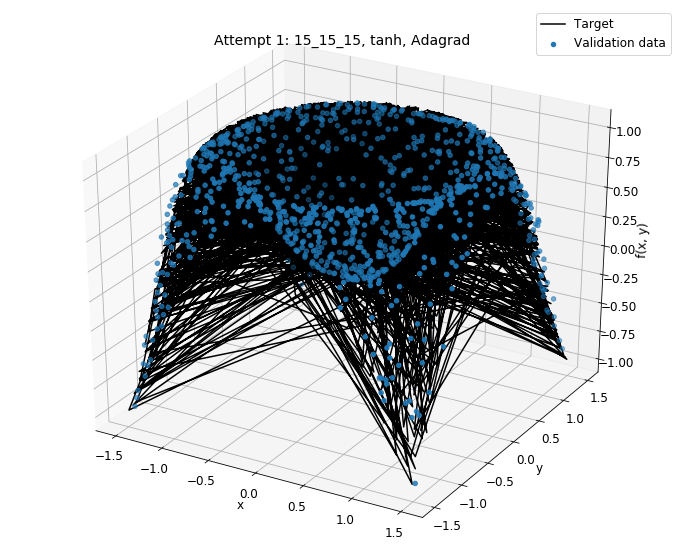

In [52]:
model = load_model("Saved/3D_f/model_15_15_15_tanh_Adagrad.mod")
# evaluate model
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=1)

#dataset to evaluate models
xy_predicted = np.random.uniform(low=-1.5, high=1.5, size=(1000,2))
z_predicted = model.predict(xy_predicted)
                                 

# print performance
print("Performance")
print('Test loss:', score[0])
print('Test mse:', score[1])

# evaluate model on trainig data 
score = model.evaluate(xy_train, z_train, batch_size=32, verbose=1)
# print performance
print()
print("Performance on training data")
print('Test loss:', score[0])
print('Test mse:', score[1])

score = model.evaluate(xy_valid, z_target, batch_size=32, verbose=1)
print()
print("Performance compared to exact curve")
print('Test loss:', score[0])
print('Test mse:', score[1])

fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
ax.scatter(xy_predicted[:,0], xy_predicted[:,1], z_predicted, cmap='inferno', marker='o', label='Validation data')
ax.plot(xy_valid[:,0], xy_valid[:,1], z_target, label='Target', c='black' )
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel ("f(x, y)")
ax.set_title ("Attempt 1: 15_15_15, tanh, Adagrad")
ax.legend()
plt.show()

3000/3000 [==============================] - 0s 94us/sample - loss: 0.0242 - mean_squared_error: 0.0242
Performance
Test loss: 0.02415960043668747
Test mse: 0.024159605
30000/30000 [==============================] - 1s 47us/sample - loss: 0.0236 - mean_squared_error: 0.0236

Performance on training data
Test loss: 0.023635639003912606
Test mse: 0.023635639
3000/3000 [==============================] - 0s 117us/sample - loss: 0.0016 - mean_squared_error: 0.0016

Performance compared to exact curve
Test loss: 0.001597163132702311
Test mse: 0.001597164


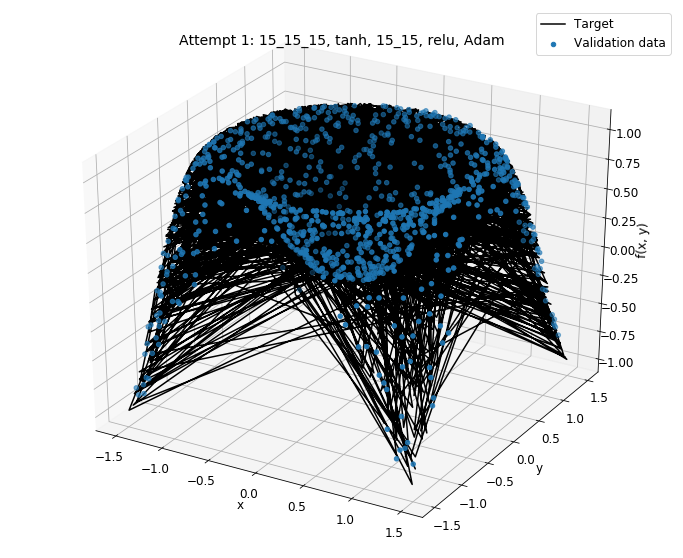

In [53]:
model = load_model("Saved/3D_f/model_15_15_15_tanh_15_15_relu_Adam.mod")
# evaluate model
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=1)

#dataset to evaluate models
xy_predicted = np.random.uniform(low=-1.5, high=1.5, size=(1000,2))
z_predicted = model.predict(xy_predicted)


# print performance
print("Performance")
print('Test loss:', score[0])
print('Test mse:', score[1])


# evaluate model on trainig data 
score = model.evaluate(xy_train, z_train, batch_size=32, verbose=1)
# print performance
print()
print("Performance on training data")
print('Test loss:', score[0])
print('Test mse:', score[1])

score = model.evaluate(xy_valid, z_target, batch_size=32, verbose=1)
print()
print("Performance compared to exact curve")
print('Test loss:', score[0])
print('Test mse:', score[1])

fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')

ax.scatter(xy_predicted[:,0], xy_predicted[:,1], z_predicted, cmap='inferno', marker='o', label='Validation data')
ax.plot(xy_valid[:,0], xy_valid[:,1], z_target, label='Target', c='black' )
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel ("f(x, y)")
ax.set_title ("Attempt 1: 15_15_15, tanh, 15_15, relu, Adam")
ax.legend()
plt.show()

3000/3000 [==============================] - 0s 112us/sample - loss: 0.0234 - mean_squared_error: 0.0234
Performance
Test loss: 0.02343840796748797
Test mse: 0.023438405
30000/30000 [==============================] - 1s 50us/sample - loss: 0.0232 - mean_squared_error: 0.0232

Performance on training data
Test loss: 0.023222785317897798
Test mse: 0.023222791
3000/3000 [==============================] - 0s 62us/sample - loss: 0.0010 - mean_squared_error: 0.0010 

Performance compared to exact curve
Test loss: 0.001005855315675338
Test mse: 0.0010058553


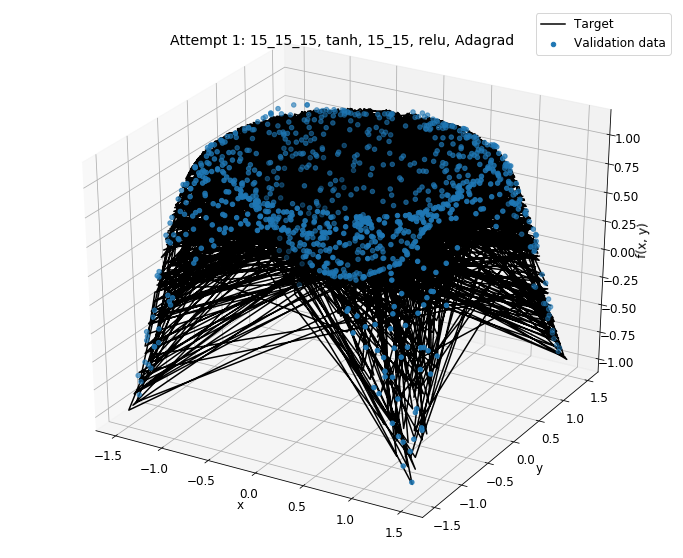

In [54]:
model = load_model("Saved/3D_f/model_15_15_15_tanh_15_15_relu_Adagrad.mod")
# evaluate model
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=1)


#dataset to evaluate models
xy_predicted = np.random.uniform(low=-1.5, high=1.5, size=(1000,2))
z_predicted = model.predict(xy_predicted)


# print performance
print("Performance")
print('Test loss:', score[0])
print('Test mse:', score[1])

# evaluate model on trainig data 
score = model.evaluate(xy_train, z_train, batch_size=32, verbose=1)
# print performance
print()
print("Performance on training data")
print('Test loss:', score[0])
print('Test mse:', score[1])

score = model.evaluate(xy_valid, z_target, batch_size=32, verbose=1)
print()
print("Performance compared to exact curve")
print('Test loss:', score[0])
print('Test mse:', score[1])

fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')

ax.scatter(xy_predicted[:,0], xy_predicted[:,1], z_predicted, cmap='inferno', marker='o', label='Validation data')
ax.plot(xy_valid[:,0], xy_valid[:,1], z_target, label='Target', c='black' )
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel ("f(x, y)")
ax.set_title ("Attempt 1: 15_15_15, tanh, 15_15, relu, Adagrad")
ax.legend()
plt.show()

***Conclusion***  
In the end it seems that this time the lesser deep NN (only three layer) fits best, maybe because in this function there are no sudden changes of slopes and therefore *relu* activations worsen the fit, or maybe it is only because it was trained for a greater number of epochs (but being a simpler NN the computational time required was nearly the same of other two attempts). Once again instead it seems that *Adagrad* is the best optimizer, confirming what emerges from cubic fitting.  